# 다나와 무선청소기

# 1. 다나와 웹페이지에서 상품정보 가져오기

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

In [2]:
url = 'https://www.danawa.com/'
driver = webdriver.Chrome('chromedriver.exe')
driver.get(url)

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_2140\1660069413.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('chromedriver.exe')


## 1-1. 1페이지 크롤링

In [3]:
# 무선청소기에 대한 정보 가져오기
driver.find_element(By.CLASS_NAME, 'search__input').send_keys('무선청소기')
time.sleep(2)

In [4]:
driver.find_element(By.CLASS_NAME, 'search__submit').click()

In [5]:
soup = BeautifulSoup(driver.page_source, 'html.parser')

In [6]:
prod_items = soup.select('.product_list .prod_item')
len(prod_items)

44

In [7]:
# 무선청소기 세부정보 가져오기
prod_item = prod_items[0]

In [8]:
prod_item

<li class="prod_item" id="productItem15170318">
<input id="productItem_categoryInfo_15170318" type="hidden" value="생활가전_청소기"/>
<input id="min_price_15170318" type="hidden" value="458920"/>
<div class="prod_main_info">
<div class="thumb_image">
<a class="thumb_link click_log_product_standard_img_" href="https://prod.danawa.com/info/?pcode=15170318&amp;keyword=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&amp;cate=10325109" id="thumbLink_15170318" onmousedown="_trkEventLog('통합검색_상품블로그_유입');" target="_blank">
<img alt="제트 VS20A956A3" onerror="this.onerror=null; this.src='//img.danawa.com/new/noData/img/noImg_160.gif';" src="//img.danawa.com/prod_img/500000/318/170/img/15170318_1.jpg?shrink=130:130&amp;_v=20210906145334"/>
</a>
<a class="btn_view_zoom" data-assemblygallerycategory="N" href="#" id="imageZoom_15170318" onclick="return false;">
<span class="ico i_zoom_vw"></span>이미지보기
										</a>
<input id="hidden_cate_sub_c1" type="hidden" value="72"/>
<input id="hidden_cate_sub_c2" type=

In [9]:
# 상품명
name = prod_item.select_one('p.prod_name').text.strip()
name

'삼성전자 비스포크 제트 VS20A956A3'

In [10]:
# 스펙목록
spec_list = prod_item.select('div.spec_list')[0].text.replace('\n', '').replace('\t', '')
spec_list

'핸디스틱청소기 / 무선형 / 흡입전용 / 흡입력: 210W / [구성] 바닥 / 솔형 / 틈새 / 연장툴 / 청정스테이션 / [배터리] 분리형 (1개) / 충전시간: 3시간30분 / 사용시간(개당): 1시간 / [성능] 디지털인버터모터 / 5단계여과 / [기능] 물걸레(별도구매) / 디스플레이표시창 / 자동물공급 / 배터리잔량표시 / 자동먼지비움 / [부가] 먼지통용량: 0.5L / 물통용량: 0.15L / 색상: 미드나잇블루 / 무게: 2.5kg / 액세서리크래들  / 크기(가로x세로x깊이): 250x930x202mm'

In [11]:
# 가격
price = prod_item.select_one('li.rank_one > p.price_sect strong').text.replace(',' ,'')
price

'458920'

In [12]:
# 1페이지에 대한 상품정보 추출
prod_data = []

for prod_item in prod_items:
    # 공백 ('li.prod_itme.product-pot') 제외
    if 'product-pot' in prod_item['class']:
        continue
    try:
        name = prod_item.select_one('p.prod_name').text.replace('\n', '')
        spec_list = prod_item.select('div.spec_list')[0].text.replace('\n', '').replace('\t', '')
        price = prod_item.select_one('li.rank_one > p.price_sect strong').text.replace(',' ,'')

        prod_data.append([name, spec_list, price])
    except:
        pass
print(len(prod_data))
print(prod_data)

40
[['삼성전자 비스포크 제트 VS20A956A3', '핸디스틱청소기 / 무선형 / 흡입전용 / 흡입력: 210W / [구성] 바닥 / 솔형 / 틈새 / 연장툴 / 청정스테이션 / [배터리] 분리형 (1개) / 충전시간: 3시간30분 / 사용시간(개당): 1시간 / [성능] 디지털인버터모터 / 5단계여과 / [기능] 물걸레(별도구매) / 디스플레이표시창 / 자동물공급 / 배터리잔량표시 / 자동먼지비움 / [부가] 먼지통용량: 0.5L / 물통용량: 0.15L / 색상: 미드나잇블루 / 무게: 2.5kg / 액세서리크래들  / 크기(가로x세로x깊이): 250x930x202mm', '458920'], ['베이스어스 차량용 청소기 A3 (해외구매)', '차량용청소기 / 무선 / 흡입력: 15,000Pa / 최대출력: 135W / 헤파필터 / 추가노즐: 틈새, 솔브러쉬 / LED라이트 / 사용시간: 45분 / 배터리 잔량표시 / 소음: 75dB / 충전방식: USB C타입 / 충전시간: 3~5시간 / 색상: 블랙, 실버 / 크기: 296x56.5mm', '48360'], ['LG전자 오브제컬렉션 코드제로 A9S AU9982', '핸디스틱청소기 / 무선형 / 흡입+물걸레겸용 / 흡입력: 220W / [구성] 와이드바닥 / 스팀물걸레 / 침구 / 솔형 / 틈새 / 올인원타워 / [배터리] 분리형 (2개) / 충전시간: 4시간 / 사용시간(개당): 1시간 / [성능] 스마트인버터모터 / 헤파필터 / 5단계여과 / [기능] IoT기능 / 디스플레이표시창 / 자동물공급 / LED라이트 / 자동먼지비움 / [부가] 색상: 카밍베이지 / 무게: 2.7kg / 크기(가로x세로x깊이): 300x1120x260mm', '1059950'], ['삼성전자 비스포크 제트 VS20B956AX', '핸디스틱청소기 / 무선형 / 흡입전용 / 흡입력: 220W / [구성] 바닥 / 솔형 / 틈새 / 연장툴 / 청정스테이션 / [배터리] 분리형 (1개) / 충전시간: 3시간30분 / 사용시간(개

In [13]:
# 상품 정보 태그에서 원하는 정보를 추출하는 함수
def get_prod_items(prod_items):
    prod_data = []

    for prod_item in prod_items:
        # 공백 ('li.prod_itme.product-pot') 제외
        if 'product-pot' in prod_item['class']:
            continue
        try:
            name = prod_item.select_one('p.prod_name').text.replace('\n', '')
            spec_list = prod_item.select('div.spec_list')[0].text.replace('\n', '').replace('\t', '')
            price = prod_item.select_one('li.rank_one > p.price_sect strong').text.replace(',' ,'')

            prod_data.append([name, spec_list, price])
        except:
            pass
    return prod_data

In [14]:
# 상품 정보를 가져오는 함수 테스트
prod_items = soup.select('div.main_prodlist ul.product_list li.prod_item')
prod_data = get_prod_items(prod_items)
print(len(prod_data))

40


## 1-2. 여러페이지에 걸친 다나와 검색 페이지 크롤링

In [15]:
# 다나와 검색 url을 만들어 주는 함수
def get_search_page_url(keyword, page):
    return f'https://search.danawa.com/dsearch.php?query={keyword}&originalQuery={keyword}&previousKeyword={keyword}&volumeType=allvs&page={page}&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=10325109&defaultPhysicsCategoryCode=72%7C80%7C81%7C0&defaultVmTab=2941&defaultVaTab=719669&tab=main'
keyword = '무선청소기'
page = 1
url = get_search_page_url(keyword, page)
url

'https://search.danawa.com/dsearch.php?query=무선청소기&originalQuery=무선청소기&previousKeyword=무선청소기&volumeType=allvs&page=1&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=10325109&defaultPhysicsCategoryCode=72%7C80%7C81%7C0&defaultVmTab=2941&defaultVaTab=719669&tab=main'

In [16]:
import time
from tqdm.notebook import tqdm

In [17]:
keyword = '무선청소기'
total_page = 10
prod_data_to_ten = []
for page in tqdm(range(1, total_page + 1)):
    url = get_search_page_url(keyword, page)
    driver.get(url)
    time.sleep(3)
    
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    # 상품정보 추출
    prod_items = soup.select('div#productListArea > div.main_prodlist > ul.product_list > li.prod_item')
    prod_item_list = get_prod_items(prod_items)
    
    # 추출한 데이터 저장
    prod_data_to_ten = prod_data_to_ten + prod_item_list

  0%|          | 0/10 [00:00<?, ?it/s]

## 1-3. 수집한 데이터 저장

In [18]:
df = pd.DataFrame(prod_data_to_ten, columns=['상품명', '스펙 목록', '가격'])

In [19]:
df.to_csv('danawa_crawling_result.csv', index=False)

In [20]:
driver.close()

# 2. 데이터 전처리

In [31]:
# 카테고리 회사명 제품 가격 사용시간(분) 흡입력
data = pd.read_csv('danawa_crawling_result.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상품명     400 non-null    object
 1   스펙 목록   400 non-null    object
 2   가격      400 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 9.5+ KB


,상품명,스펙 목록,가격
0,삼성전자 비스포크 제트 VS20A956A3,핸디스틱청소기 / 무선형 / 흡입전용 / 흡입력: 210W / [구성] 바닥 / 솔...,458920
1,베이스어스 차량용 청소기 A3 (해외구매),"차량용청소기 / 무선 / 흡입력: 15,000Pa / 최대출력: 135W / 헤파필...",48360
2,LG전자 오브제컬렉션 코드제로 A9S AU9982,핸디스틱청소기 / 무선형 / 흡입+물걸레겸용 / 흡입력: 220W / [구성] 와이...,1059950
3,삼성전자 비스포크 제트 VS20B956AX,핸디스틱청소기 / 무선형 / 흡입전용 / 흡입력: 220W / [구성] 바닥 / 솔...,539990
4,샤오미 CLEANFLY 차량용 무선 청소기 4세대 H2 (해외구매),"차량용청소기 / 무선 / 흡입력: 16,800Pa / 최대출력: 120W / 헤파필...",63330


## 2-1. 회사명 모델명 정리

In [98]:
company_list = []
product_list = []
for title in data['상품명']:
    title_info = title.split(' ', 1)
    company_name = title_info[0]
    product_name = title_info[1]
    company_list.append(company_name)
    product_list.append(product_name)

## 2-2 스펙목록에서 카테고리 사용시간, 흡입력을 추출

In [99]:
spec_list = data['스펙 목록'][0].split(' / ')
spec_list

['핸디스틱청소기',
 '무선형',
 '흡입전용',
 '흡입력: 210W',
 '[구성] 바닥',
 '솔형',
 '틈새',
 '연장툴',
 '청정스테이션',
 '[배터리] 분리형 (1개)',
 '충전시간: 3시간30분',
 '사용시간(개당): 1시간',
 '[성능] 디지털인버터모터',
 '5단계여과',
 '[기능] 물걸레(별도구매)',
 '디스플레이표시창',
 '자동물공급',
 '배터리잔량표시',
 '자동먼지비움',
 '[부가] 먼지통용량: 0.5L',
 '물통용량: 0.15L',
 '색상: 미드나잇블루',
 '무게: 2.5kg',
 '액세서리크래들 ',
 '크기(가로x세로x깊이): 250x930x202mm']

In [100]:
# 카테고리 정보를 추출
category = spec_list[0]
category

'핸디스틱청소기'

In [101]:
# 사용시간, 흡입력이 포함된 원소 추출
for spec in spec_list:
    if '사용시간' in spec:
        use_time_spec = spec
    elif '흡입력' in spec:
        suction_spec = spec
print(use_time_spec)
print(suction_spec)

사용시간(개당): 1시간
흡입력: 210W


In [105]:
use_time_value = use_time_spec.split(' ')[1].strip()
use_time_value
# suction_value = suction_spec.split(' ')[1].strip()

'1시간'

In [138]:
# 카테고리, 사용시간, 흡입력 추출
category_list = []
use_time_list = []
suction_list = []
for spec_data in data['스펙 목록']:
    spec_list = spec_data.split(' / ')
    # 카테고리
    category = spec_list[0]
    category_list.append(category)
    
    # 사용시간, 흡입력
    use_time_value = None
    suction_value = None
    for spec in spec_list:
        if '사용시간' in spec:
            use_time_value = spec.split(' ')[1].strip()
        elif '흡입력' in spec:
            suction_value = spec.split(' ')[-1].strip()
    use_time_list.append(use_time_value)
    suction_list.append(suction_value)

In [139]:
print(len(category_list), category_list[0:5])
print(len(use_time_list), use_time_list[0:5])
print(len(suction_list), suction_list[0:5])

400 ['핸디스틱청소기', '차량용청소기', '핸디스틱청소기', '핸디스틱청소기', '차량용청소기']
400 ['1시간', '45분', '1시간', '1시간', '30분']
400 ['210W', '15,000Pa', '220W', '220W', '16,800Pa']


## 2-3. 무선청소기 사용시간 단위 통일

In [140]:
# 40분 -> 40, 3시간30분 -> 210
def convert_time_minute(time):
    try:
        if '시간' in time:
            hour = time.split('시간')[0] # 3시간30분 -> 3
            if '분' in time:
                minute = time.split('시간')[-1].split('분')[0] # 3시간30분 -> 30분 -> 30
            else:
                minute = 0 # 1시간 -> 0
        else:
            hour = 0
            minute = time.split('분')[0]
        return int(hour) * 60 + int(minute)
    except:
        return None

In [141]:
# 함수 테스트
times = ['40분', '4분', '1시간', '2시간25분', '4시간']
for time in times:
    time_value = convert_time_minute(time)
    print(time , '=', time_value)

40분 = 40
4분 = 4
1시간 = 60
2시간25분 = 145
4시간 = 240


In [142]:
# 사용시간을 분 단위로 통일
convert_use_time_list = []
for time in use_time_list:
    value = convert_time_minute(time)
    convert_use_time_list.append(value)

In [143]:
print(len(convert_use_time_list), convert_use_time_list[0:10])

400 [60, 45, 60, 60, 30, 35, 60, 60, 60, 25]


## 2-4. 무선 청소기 흡입력 단위 통일

In [147]:
# w = 100pa
def convert_suction(value):
    try:
        value = value.upper()
        if 'AW' in value or 'W' in value:
            result = value.replace('A', '').replace('W', '').replace(',', '').replace('~', '')
            result = int(result)
        elif 'PA' in value:
            result = value.replace('PA', '').replace(',', '').replace('~', '')
            result = int(result) / 100
        else:
            result = None
        return result
    except:
        return None

In [148]:
# 흡입력 단위 통일
convert_suction_list = []
for power in suction_list:
    value = convert_suction(power)
    convert_suction_list.append(value)

In [149]:
print(len(convert_suction_list), convert_suction_list[0:10])

400 [210, 150.0, 220, 220, 168.0, None, 200, 200, 210, 150.0]


## 2-5. 전처리 결과를 엑셀로 저장

In [178]:
pd_data = pd.DataFrame()
pd_data['카테고리'] = category_list
pd_data['회사명'] = company_list
pd_data['제품'] = product_list
pd_data['가격'] = data['가격']
pd_data['사용시간'] = convert_use_time_list
pd_data['흡입력'] = convert_suction_list
pd_data.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디스틱청소기,삼성전자,비스포크 제트 VS20A956A3,458920,60.0,210.0
1,차량용청소기,베이스어스,차량용 청소기 A3 (해외구매),48360,45.0,150.0
2,핸디스틱청소기,LG전자,오브제컬렉션 코드제로 A9S AU9982,1059950,60.0,220.0
3,핸디스틱청소기,삼성전자,비스포크 제트 VS20B956AX,539990,60.0,220.0
4,차량용청소기,샤오미,CLEANFLY 차량용 무선 청소기 4세대 H2 (해외구매),63330,30.0,168.0


In [179]:
pd_data.to_csv('result_preprocessing', index=False)

# 3. 핸디스틱청소기로 가성비 좋은 제품 찾기

## 3-1. 핸디스틱청소기만 추출

In [180]:
pd_data['카테고리'].value_counts()

핸디스틱청소기             221
차량용청소기               89
물걸레청소기               31
핸디청소기                30
스틱청소기                 7
욕실청소기                 7
침구청소기                 5
핸디/스틱청소기+로봇청소기세트      3
업소용청소기                3
차량용선풍기                1
핸디/스틱청소기+공기청정기세트      1
수영장청소기                1
물걸레청소기+스팀청소기          1
Name: 카테고리, dtype: int64

In [181]:
pd_data_final = pd_data[pd_data['카테고리'].isin(['핸디스틱청소기'])]
len(pd_data_final)

221

In [183]:
pd_data_final['가격'].unique() # "가격비교예정"인 데이터가 있는지 확인

array([ 458920, 1059950,  539990,  160080,  576860,  359980,  439070,
        468880,  157730, 1035480,  719780,  179000,  484930,  619510,
        608000,  671260,  824780,  764810,  565730,  928800, 1320150,
        573140,  691080,  870300, 1108360,  521330,  179200,  665552,
        687140,  716890,  755100,  162470,  792100,  811750,  461080,
         56860,  226060,  591090,  578630,  237280,  123600,  543920,
        718140,  239000,  613350, 1160850,  499500,  948990,  167910,
        795470,  827470,  189000,  329000,  750500,  149000,   93790,
        693780,  278220,  193000,  954900,  942170,  139000,  188090,
        430950,   73790,  980600,  902090,  601590,  379080,  184990,
        104360,   77320,  233150,   38960,  957390,  178100,  366340,
        699390, 1266930,  296100,  327800,  843650,  470370,   89308,
         63760,  394670,  230330,   77790,   41900, 1043820,   47400,
        219890,  184640,  709600,   83650,  144690,  643160,   77130,
        156990,  152

In [184]:
# 만약 "가격비교예정" 데이터가 있으면 상품을 제외
cond = pd_data_final['가격'] != "가격비교예정"
pd_data_final = pd_data_final[cond]
len(pd_data_final)

221

In [187]:
# 사용시간과 흡입력 기준 정렬
top_list = pd_data_final.sort_values(['사용시간', '흡입력'], ascending=False)
top_list

,카테고리,회사명,제품,가격,사용시간,흡입력
132,핸디스틱청소기,샤오미,드리미 V12,327800,90.0,270.0
352,핸디스틱청소기,샤오미,드리미 V11,460000,90.0,250.0
350,핸디스틱청소기,샤오미,로이드미 X30 프로,248990,70.0,265.0
30,핸디스틱청소기,다이슨,Gen5 디텍트™ 컴플리트,1320150,70.0,262.0
131,핸디스틱청소기,샤오미,드리미 T20,296100,70.0,250.0
...,...,...,...,...,...,...
181,핸디스틱청소기,한빛시스템,HV-5088,77130,NaN,NaN
228,핸디스틱청소기,보만,VC7210,48570,NaN,NaN
233,핸디스틱청소기,카처,VC4I 코드리스 PLUS,321990,NaN,NaN
341,핸디스틱청소기,기펠,ZET-10,228000,NaN,NaN


## 3-2. 가성비제품 추출

In [188]:
# 평균값 정리
price_mean_value = pd_data_final['가격'].mean()
suction_mean_value = pd_data_final['흡입력'].mean()
use_time_mean_value = pd_data_final['사용시간'].mean()
print('가격 평균값', price_mean_value)
print('흡입력 평균값', suction_mean_value)
print('사용시간 평균값', use_time_mean_value)

가격 평균값 376117.149321267
흡입력 평균값 198.9047619047619
사용시간 평균값 48.12322274881517


In [190]:
# 가성비 좋은 제품 탐색 - 가격 < 평균, 흡입력, 사용시간 > 평균
condition_data = pd_data_final[(pd_data_final['가격'] <= price_mean_value) & 
                               (pd_data_final['흡입력'] >= suction_mean_value) & 
                               (pd_data_final['사용시간'] >= use_time_mean_value)]
condition_data

,카테고리,회사명,제품,가격,사용시간,흡입력
7,핸디스틱청소기,삼성전자,제트 VS20T92K3QD,359980,60.0,200.0
11,핸디스틱청소기,샤오미,드리미 V10,157730,60.0,220.0
16,핸디스틱청소기,아이닉,NEW i20,179000,50.0,300.0
63,핸디스틱청소기,샤오미,COCLEAN V30,123600,60.0,250.0
96,핸디스틱청소기,원더스리빙,원더스 다이나킹 Z24,139000,50.0,280.0
116,핸디스틱청소기,샤오미,드리미 V9,104360,60.0,200.0
131,핸디스틱청소기,샤오미,드리미 T20,296100,70.0,250.0
132,핸디스틱청소기,샤오미,드리미 V12,327800,90.0,270.0
196,핸디스틱청소기,욜로닉스,로헨 L30,169000,50.0,350.0
240,핸디스틱청소기,델로라,V11 파워 300W,84370,70.0,220.0


## 3-3. 데이터 시각화

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns

In [193]:
# 결측치 제거
chart_data = pd_data_final.dropna(axis=0)
len(chart_data)

144

In [195]:
# 흡입력, 사용시간의 최댓값/평균값 정리
suction_max_value = chart_data['흡입력'].max()
suction_mean_value = chart_data['흡입력'].mean()
use_time_max_value = chart_data['사용시간'].max()
use_time_mean_value = chart_data['사용시간'].mean()

C:\Python39\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python39\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python39\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python39\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python39\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54648 (\N{HANGUL SYLLABLE HAEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python39\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46356 (\N

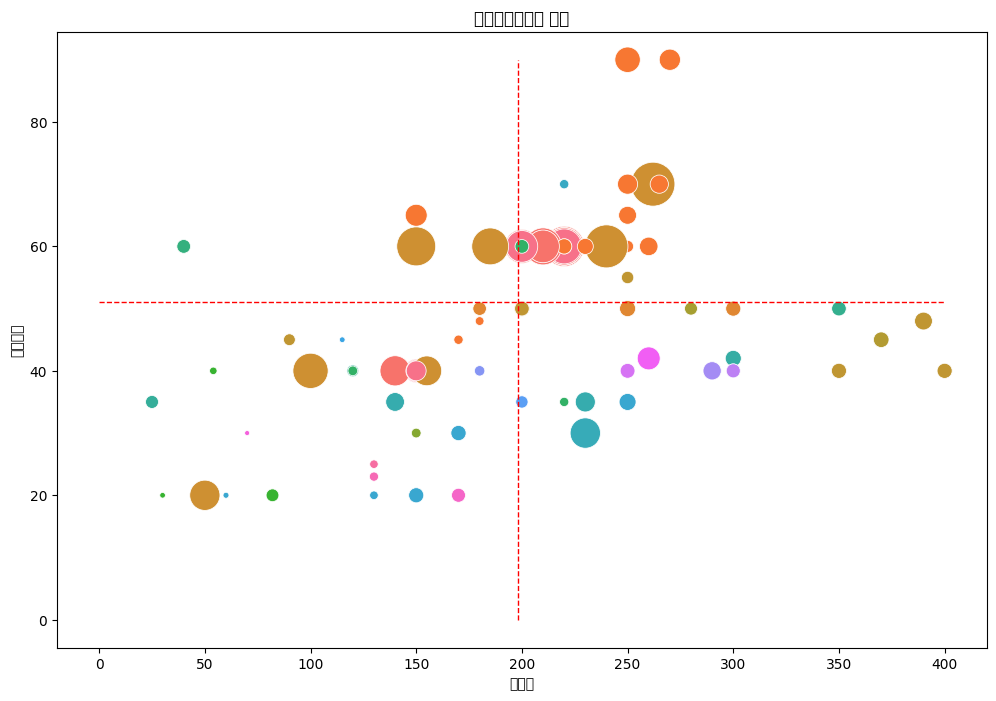

In [197]:
# 청소기 성능 시각화
plt.figure(figsize=(12,8))
plt.title('핸디스틱청소기 차트')
sns.scatterplot(x = '흡입력', y = '사용시간', size = '가격', hue = chart_data['회사명'],
               data = chart_data, sizes = (10, 1000), legend = False)
plt.plot([0, suction_max_value],
         [use_time_mean_value, use_time_mean_value],
        'r--', lw = 1)
plt.plot([suction_mean_value, suction_mean_value],
         [0, use_time_max_value], 
        'r--', lw = 1)
plt.show()

# 4. 인기 제품의  데이터 시각화

In [198]:
chart_data_selected = chart_data[:20]
len(chart_data_selected)

20

In [ ]:
suction_max_value = chart_data_selected['흡입력'].max()
suction_mean_value = chart_data_selected['흡입력'].mean()
use_time_max_value = chart_data_selected['사용시간'].max()
use_time_mean_value = chart_data_selected['사용시간'].mean()

findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
C:\Python39\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python39\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python39\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python39\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN})

findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font famil

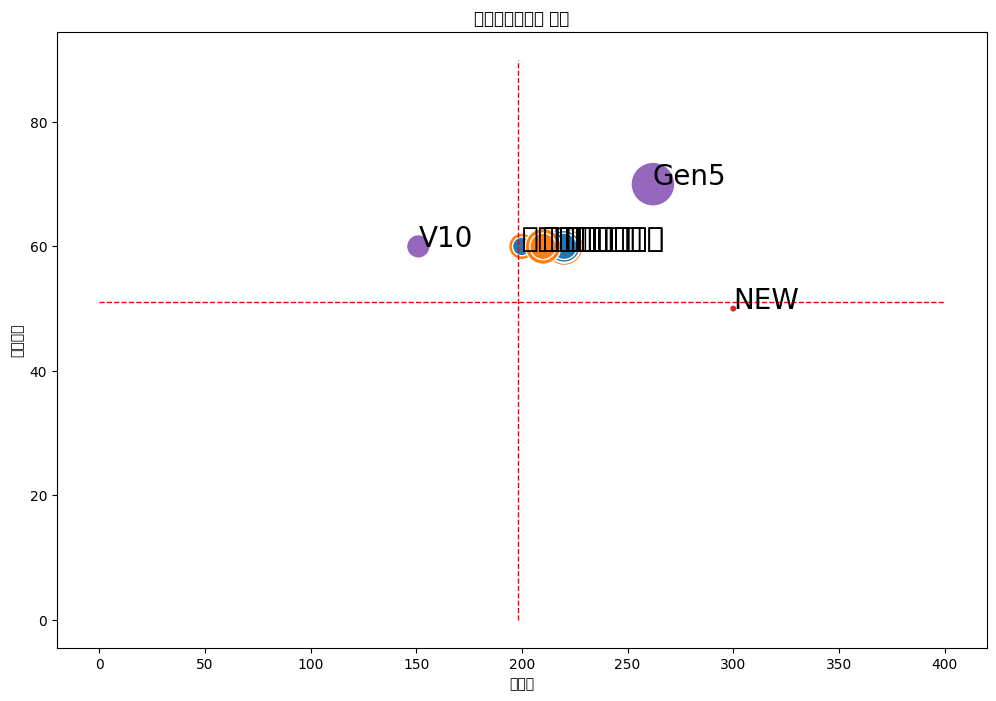

In [203]:
# 청소기 성능 시각화
plt.figure(figsize=(12,8))
plt.title('핸디스틱청소기 차트')
sns.scatterplot(x = '흡입력', y = '사용시간', size = '가격', hue = chart_data_selected['회사명'],
               data = chart_data_selected, sizes = (10, 1000), legend = False)
plt.plot([0, suction_max_value],
         [use_time_mean_value, use_time_mean_value],
        'r--', lw = 1)
plt.plot([suction_mean_value, suction_mean_value],
         [0, use_time_max_value], 
        'r--', lw = 1)
for index, row in chart_data_selected.iterrows():
    x = row['흡입력']
    y = row['사용시간']
    s = row['제품'].split(' ')[0]
    plt.text(x, y, s, size = 20)
plt.show()